#### **Installing dependencies**

In [2]:
!pip install transformers sentencepiece datasets rouge -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#### **Importing libraries**

In [3]:

import torch
import pandas as pd
from rouge import Rouge
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

#### **Downloading the data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test = pd.read_csv("/content/drive/MyDrive/test-bengali.csv")

In [6]:
train = pd.read_csv("/content/drive/MyDrive/train-bengali.csv")

In [7]:
test

,id,Heading,Summary,Article
0,BengaliNews_test_0,দেশের মধ্যে প্রথম আধার কার্ড পেয়েছিলেন ইনি! ক...,Ranjana Sonawane the first aadhaar card holder...,পুণে: দুপুর আড়াইটে। সারা সকাল কাজ সেরে নিজের ক...
1,BengaliNews_test_1,Padma Shri News: সারিন্দা বাজিয়ে ৮ যুগ ধরে ভেল...,Mangala Kanti Roy Padma Shri: সঙ্গীত তাঁর জীবন...,জলপাইগুড়ি: জলপাইগুড়ি জেলায় ময়নাগুড়ি ব্লকের প্র...
2,BengaliNews_test_2,Rail Ticket Reservation System Change|| ট্রেন ...,Eastern railway changed ticket reservation sys...,#আসানসোল: সংরক্ষিত কামরায় টিকিটের ক্ষেত্রে আম...
3,BengaliNews_test_3,PMAY Scheme: প্রধানমন্ত্রী আবাস যোজনার সুবিধা ...,Easy and simple steps to apply for pradhanmant...,#নয়াদিল্লি: মাথার উপর পাকা ছাদ পাবেন দেশের সম...
4,BengaliNews_test_4,"হৃদয় ভাল রাখবেন ? হার্ট অ্যাটাক, স্ট্রোক, কার...","Know Difference Between Heart Attack, Stroke a...","#কলকাতা : হার্ট অ্যাটাক , কার্ডিয়াক অ্যারেস্ট..."
...,...,...,...,...
2946,BengaliNews_test_2995,Purulia News I Female Constable Viral Story: উ...,Purulia News I Female Constable Viral Story: ব...,পুরুলিয়া: রাজ্য জুড়ে চলছে উচ্চমাধ্যমিক পরীক্...
2947,BengaliNews_test_2996,West Bengal News: ডাল চোর! বাংলার অঙ্গনওয়ারি ...,"West Bengal News: bangla news, Pulses stolen i...",#শান্তিপুর: চোরেদের হয়তো ভীষণ পছন্দ ডাল! তাই ...
2948,BengaliNews_test_2997,সুখবর! এবার কেবল মিসড কল দিয়ে পেয়ে যাবেন LPG...,Get LPG connection by just giving a missed cal...,#নয়াদিল্লি: রান্নার গ্যাসের নতুন কানেকশন নেওয...
2949,BengaliNews_test_2998,Duare Sarkar: পঞ্চায়েত নির্বাচনের আগে ফের বড়...,chief secretary hariskrishna dwivedi calls imp...,"কলকাতা : দুয়ারে সরকার নিয়ে আজ, শনিবার বিকেল ..."


In [8]:
train

,id,Heading,Summary,Article
0,bengali_2023_train_0,"Chandrayaan-3: আজ কখন, কোথা থেকে উৎক্ষেপণ, ভার...","Chandrayaan-3: আজ কখন, কোথা থেকে উৎক্ষেপণ, ভার...",শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দার...
1,bengali_2023_train_1,Suvendu Adhikari: 'আপনি বিজেপির রাজ্য সভাপতি হ...,Suvendu Adhikari: নন্দীগ্রামে পঞ্চায়েত ভোট থেক...,কলকাতা: নন্দীগ্রামে পঞ্চায়েত ভোট থেকে শুরু করে...
2,bengali_2023_train_2,Bus Accident: সল্টলেক বিকাশ ভবনের সামনে বাস দু...,Bus Accident: রবিবারের দুপুরে শহরের রাস্তায় বা...,কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর্...
3,bengali_2023_train_3,Saumitra Khan: অভিষেকের সঙ্গে মিটিং? তৃণমূলেই ...,"সৌমিত্র খাঁ বলেন, ২০১৯ সালে বিজেপিতে যোগদানের ...","প্রিয়ব্রত গোস্বামী, বাঁকুড়া: তৃণমূলে যাওয়ার ..."
4,bengali_2023_train_4,Sujata Mondal: সৌমিত্র তৃণমূলে ফিরবেন? এরই মধ্...,দলীয় নেতা কর্মীদের মিষ্টি মুখ করিয়ে উৎসাহ দিতে...,বাঁকুড়া: বড় অঙ্কের ব্যবধানে বাঁকুড়ার জয়পুর ব্...
...,...,...,...,...
12351,bengali_2023_train_12351,Pawandeep Rajan-Arunita Kanjilal: আর রাখঢাক নয়...,Indian Idol 12 Winner Pawandeep Rajan Confirms...,#মুম্বই: ইন্ডিয়ান আইডল ১২ চলাকালীনই তাঁদের সম্...
12352,bengali_2023_train_12352,Pawandeep Rajan-Arunita Kanjilal: ইন্ডিয়ান আইড...,Indian Idol 12 Grand Finale Pawandeep Rajan an...,#মুম্বই: আট মাসের টানা 'গানের লড়াই'-এর পর রবি...
12353,bengali_2023_train_12353,Shibani Dandekar Javed Akhtar Dance: নববধূ শিব...,"Shibani Dandekar Javed Akhtar Dance, শিবানি ডা...",#মুম্বই: গত ১৯ ফেব্রুয়ারি খান্ডালায় জাঁকজমক ভা...
12354,bengali_2023_train_12354,Ashes Series: Aus vs Eng: কোনওক্রমে হার বাঁচিয...,Ashes Series: Aus vs Eng: কোনওক্রমে হার বাঁচিয...,#সিডনি: অস্ট্রেলিয়া বনাম ইংল্যান্ডের (Austra...


In [9]:
text = train['Article']
goldsummary = train['Summary']

**Note**: Mostly data is cleaned except few numerical values such as days and count, and maybe it is best not to remove them becuase summary also contains these numbers and it can be valuable for text generation.

### **Model1 : BART**

In [10]:
bart_checkpoint = "ai4bharat/IndicBART"

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
tokenizer_bart = AutoTokenizer.from_pretrained(bart_checkpoint,
                                               do_lower_case=False,
                                               use_fast=False,
                                               keep_accents=True)

model_bart = AutoModelForSeq2SeqLM.from_pretrained(bart_checkpoint).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/832 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/221 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/976M [00:00<?, ?B/s]

In [13]:
bos_id = tokenizer_bart._convert_token_to_id_with_added_voc("<s>")
eos_id = tokenizer_bart._convert_token_to_id_with_added_voc("</s>")
pad_id = tokenizer_bart._convert_token_to_id_with_added_voc("<pad>")

In [15]:
import time
import torch

# Track the start time
start_time = time.time()
test
# Define half the dataset length
half_length = len(text) // 20  # Process only a little of the dataset

# Summary storage
SystemSummary = []
print("Starting now")

for i, input_text in enumerate(text[:half_length]):  # Only iterate over half of the dataset
    if i % 10 == 0:
        print(f"Processing input {i+1}/{half_length}")

    # Step 1: Tokenize the input text
    if i % 10 == 0:
        print(f"Tokenizing input text: {input_text[:50]}...")  # Show first 50 chars of input for brevity
    inp = tokenizer_bart(
        input_text,
        add_special_tokens=False,
        truncation=True,
        return_tensors="pt",
        padding='max_length',
        max_length=1024
    )['input_ids'].to(device)
    if i % 10 == 0:
        print(f"Tokenized input shape: {inp.shape}")

    # Step 2: Generate the summary
    if i % 10 == 0:
        print("Generating summary using model...")
    model_output = model_bart.generate(
        inp,
        use_cache=True,
        num_beams=4,
        max_length=70,
        min_length=30,
        early_stopping=True,
        pad_token_id=pad_id,
        bos_token_id=bos_id,
        eos_token_id=eos_id,
        decoder_start_token_id=tokenizer_bart._convert_token_to_id_with_added_voc("<2en>")
    )
    if i % 10 == 0:
        print(f"Generated token IDs: {model_output[0].tolist()}")

    # Step 3: Decode the generated output
    decoded_output = tokenizer_bart.decode(
        model_output[0],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )
    if i % 10 == 0:
        print(f"Decoded summary: {decoded_output[:50]}...")  # Show first 50 chars of summary

    # Step 4: Append to the summary list
    SystemSummary.append(decoded_output)
    if i % 10 == 0:
        print(f"Summary {i+1} appended to SystemSummary")

# Total time taken
end_time = time.time()
print(f"Total processing time for half dataset: {end_time - start_time:.2f} seconds")


Starting now
Processing input 1/617
Tokenizing input text: শ্রীহরিকোটা:  ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গ...
Tokenized input shape: torch.Size([1, 1024])
Generating summary using model...
Generated token IDs: [64004, 41, 60859, 59648, 59569, 60151, 60208, 59569, 59593, 59738, 59648, 59648, 59656, 59478, 53, 41, 60859, 59478, 59569, 59679, 59609, 59569, 41, 60028, 60208, 59478, 59738, 59478, 60859, 41, 59656, 59593, 60038, 59648, 1, 59478, 59647, 59609, 41, 60817, 60859, 59609, 59569, 41, 59648, 59478, 59569, 60051, 60817, 41, 60364, 59569, 59648, 59656, 59609, 59569, 41, 59656, 59593, 59647, 50, 41, 60817, 60038, 60038, 41, 60208, 59656, 59609, 2]
Decoded summary: শ্রীহরিক্্বা: শারতের মহাকাশ বিং্ানে 留শের ্ারু留 গর্...
Summary 1 appended to SystemSummary
Processing input 11/617
Tokenizing input text: অন্ধ্রপ্রদেশের শ্রীহরিকোটার সতীশ ধাওয়ান মহাকাশ কে...
Tokenized input shape: torch.Size([1, 1024])
Generating summary using model...
Generated token IDs: [64004, 41, 59648, 59647, 59648,

In [16]:
Summaries = pd.DataFrame(list(zip(goldsummary, SystemSummary)), columns =['GoldSummary', 'BartSummary'])
Summaries

,GoldSummary,BartSummary
0,"Chandrayaan-3: আজ কখন, কোথা থেকে উৎক্ষেপণ, ভার...",শ্রীহরিক্্বা: শারতের মহাকাশ বিং্ানে 留শের ্ারু留...
1,Suvendu Adhikari: নন্দীগ্রামে পঞ্চায়েত ভোট থেক...,কলকাতা: নন্্্্রামে প্্া্্্্্্্্ব্রামে শুরু করে...
2,Bus Accident: রবিবারের দুপুরে শহরের রাস্তায় বা...,কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর...
3,"সৌমিত্র খাঁ বলেন, ২০১৯ সালে বিজেপিতে যোগদানের ...","প্রিয়ব্রত বংস্বামী, বাংকুং়া: ত達達ম達লে যাংয়ার..."
4,দলীয় নেতা কর্মীদের মিষ্টি মুখ করিয়ে উৎসাহ দিতে...,বাংকুং়া: ব্্্্্কের ব্যবংানে বা達কুং়ার ব্যবংর ...
...,...,...
612,Asansol News: তিনজনে একটি বাইকে জুবিলী মোড় এর...,"াসানসংল, পশ্ংিম বর্ংমান : শাতীয় সং়কে মর্মান্..."
613,বহিরাগতদের জন্য অত্যাচারিত হচ্ছেন গ্রামের মহিল...,্সানসংল : ্লাকায় বা্াত বাশ়ে বহিরাগতদের। বুরি...
614,West Bardhaman News: সংকল্প পূরণ হল না। ফেরা হ...,"বসানসংল, পশ্ংিম বর্ংমান: সকাল সকাল বেরিয়েংিলে..."
615,bangla news west bengal news Nawsad Siddique s...,কলকাতা: প্্ায়েত শ্্্ার প্্্্্্্্্্্তপ্্্্ার র...


In [17]:
rouge = Rouge()
score = rouge.get_scores(Summaries['BartSummary'], Summaries['GoldSummary'], avg=True)
BartRouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
BartRouge

,rouge-1,rouge-2,rouge-l
recall,0.019620,0.003979,0.019339
precision,0.059766,0.013124,0.058904
f-measure,0.028822,0.005937,0.028403


### **Model2 : T5**

In [18]:
t5_checkpoint = "csebuetnlp/mT5_multilingual_XLSum"

tokenizer_t5 = AutoTokenizer.from_pretrained(t5_checkpoint)
model_t5 = AutoModelForSeq2SeqLM.from_pretrained(t5_checkpoint).to(device)

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning:

The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.



pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

In [19]:
%%time

SystemSummary1 = []

print("Starting summarization process...")  # Starting message

for i, input_text in enumerate(text):
  if i == 617:
    break
  else:
    # Print the current text being processed
    print(f"\nProcessing text {i + 1} out of {len(text)}:")

    # Step 1: Tokenizing input text
    print("  Tokenizing input text...")
    input_ids = tokenizer_t5(
        input_text,
        return_tensors="pt",
        padding="max_length",
        truncation=True,
        max_length=768
    )["input_ids"].to(device)
    print("  Tokenization complete.")

    # Step 2: Generate summary every 10 iterations
    if i % 10 == 0:
        print(f"Generating summary for text {i + 1} using model...")

    # Step 3: Generating model output
    model_output = model_t5.generate(
        input_ids=input_ids,
        num_beams=4,
        max_length=70,
        min_length=30,
        no_repeat_ngram_size=2,
        early_stopping=True
    )
    print("  Summary generated successfully.")

    # Step 4: Decoding model output to text
    print("  Decoding generated summary...")
    decoded_output = tokenizer_t5.decode(
        model_output[0],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )
    print("  Decoding complete.")

    # Step 5: Append decoded summary to results
    print("  Appending summary to the list.")
    SystemSummary1.append(decoded_output)

print("\nSummarization process complete.")
SystemSummary1


Starting summarization process...

Processing text 1 out of 12356:
  Tokenizing input text...
  Tokenization complete.
Generating summary for text 1 using model...
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 2 out of 12356:
  Tokenizing input text...
  Tokenization complete.


model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 3 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 4 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 5 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 6 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 7 out of 12356:
  Tokenizing input text...


['ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন! চন্দ্রায়ন ৩ -র উৎক্ষেপণ',
 'কলকাতার নন্দীগ্রামে পঞ্চায়েত ভোট থেকে শুরু করে রাজ্যের ডেঙ্গি পরিস্থিতি, একাধিক বিষয়ে আবার মুখ খুললেন রাজ্য বিরোধী দলনেতা শুভেন্দু অধিকারী।',
 'কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর্ঘটনা। সল্টলেক বিকাশ ভবনের সামনে নিয়ন্ত্রণ হারাল বাস।',
 'ভারতের লোকসভা নির্বাচনে বিজেপির জয় নিয়ে তীব্র কটাক্ষ করেছেন বিজেপি নেত্রী অমিত শাহ।',
 'ভারতের লোকসভা নির্বাচনে বড় অঙ্কের ব্যবধানে বিজেপির জেলা পরিষদের ৪৪ নং থেকে জয়ী হয়েছেন তৃণমূলের সুজাতা মণ্ডল।',
 'ভারতের লোকসভা নির্বাচনে বিজেপির সর্বভারতীয় সহ সভাপতির পদ হারিয়েছেন দিলীপ ঘোষ।',
 'ভারতের বারাসাত রাজ্যের মধ্যমগ্রামে এবার ডেঙ্গি আক্রান্ত হয়ে এক গৃহবধূর মৃত্যুর খবরে রাজ্যে শোরগোল পড়েছে।',
 'বর্ধমানের পৌরসভার একটি দোকান ঘর কার দখলে থাকবে তা নিয়ে গোল বেঁধেছে।',
 'কলকাতার প্রাক্তন মুখ্যমন্ত্রী বুদ্ধদেব ভট্টাচার্যর চিকিৎসক সূত্র জানিয়েছে, তাঁর অবস্থা এখনও স্থিতিশীল।',
 'দক্ষিণ ২৪ পরগনা বন বিভাগের বাঘ সংরক্ষণ প্রকল্প বন্ধ করে দেওয়ার সিদ্ধান্ত নেওয়া হয়েছে।'

In [20]:
Summaries['T5Summary'] = SystemSummary1

In [21]:
Summaries['T5Summary'] = (SystemSummary1 * (len(Summaries) // len(SystemSummary1) + 1))[:len(Summaries)]


In [22]:
Summaries.head()

,GoldSummary,BartSummary,T5Summary
0,"Chandrayaan-3: আজ কখন, কোথা থেকে উৎক্ষেপণ, ভার...",শ্রীহরিক্্বা: শারতের মহাকাশ বিং্ানে 留শের ্ারু留...,ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন!...
1,Suvendu Adhikari: নন্দীগ্রামে পঞ্চায়েত ভোট থেক...,কলকাতা: নন্্্্রামে প্্া্্্্্্্্ব্রামে শুরু করে...,কলকাতার নন্দীগ্রামে পঞ্চায়েত ভোট থেকে শুরু কর...
2,Bus Accident: রবিবারের দুপুরে শহরের রাস্তায় বা...,কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর...,কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর...
3,"সৌমিত্র খাঁ বলেন, ২০১৯ সালে বিজেপিতে যোগদানের ...","প্রিয়ব্রত বংস্বামী, বাংকুং়া: ত達達ম達লে যাংয়ার...",ভারতের লোকসভা নির্বাচনে বিজেপির জয় নিয়ে তীব্...
4,দলীয় নেতা কর্মীদের মিষ্টি মুখ করিয়ে উৎসাহ দিতে...,বাংকুং়া: ব্্্্্কের ব্যবংানে বা達কুং়ার ব্যবংর ...,ভারতের লোকসভা নির্বাচনে বড় অঙ্কের ব্যবধানে বি...


In [23]:
rouge = Rouge()
score = rouge.get_scores(Summaries['T5Summary'], Summaries['GoldSummary'], avg=True)
T5Rouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
T5Rouge

,rouge-1,rouge-2,rouge-l
recall,0.098420,0.050175,0.091538
precision,0.200629,0.108170,0.185549
f-measure,0.127614,0.065941,0.118396


In [24]:
from transformers import MBartForConditionalGeneration, MBartTokenizer

# Initialize model and tokenizer
model_mbart = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-cc25").to(device)
tokenizer_mbart = MBartTokenizer.from_pretrained("facebook/mbart-large-cc25")

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/205 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [25]:
%%time
SystemSummary_mbart = []
print("Starting summarization process with mBART...")  # Starting message

for i, input_text in enumerate(text):
    if i == 617:
        break
    else:
        # Print the current text being processed
        print(f"\nProcessing text {i + 1} out of {len(text)}:")

        # Step 1: Tokenizing input text
        print("  Tokenizing input text...")
        input_ids = tokenizer_mbart(
            input_text,
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=1024  # mBART typically allows longer sequences
        )["input_ids"].to(device)
        print("  Tokenization complete.")

        # Step 2: Generate summary every 10 iterations
        if i % 10 == 0:
            print(f"Generating summary for text {i + 1} using mBART model...")

        # Step 3: Generating model output
        model_output = model_mbart.generate(
            input_ids=input_ids,
            num_beams=4,
            max_length=70,
            min_length=30,
            no_repeat_ngram_size=2,
            early_stopping=True,
            forced_bos_token_id=tokenizer_mbart.lang_code_to_id["en_XX"]  # For mBART, specify output language
        )
        print("  Summary generated successfully.")

        # Step 4: Decoding model output to text
        print("  Decoding generated summary...")
        decoded_output = tokenizer_mbart.decode(
            model_output[0],
            skip_special_tokens=True,
            clean_up_tokenization_spaces=False
        )
        print("  Decoding complete.")

        # Step 5: Append decoded summary to results
        print("  Appending summary to the list.")
        SystemSummary_mbart.append(decoded_output)

print("\nSummarization process complete.")
SystemSummary_mbart

Streaming output truncated to the last 5000 lines.
  Tokenizing input text...
  Tokenization complete.
Generating summary for text 1 using mBART model...
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 2 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 3 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 4 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated successfully.
  Decoding generated summary...
  Decoding complete.
  Appending summary to the list.

Processing text 5 out of 12356:
  Tokenizing input text...
  Tokenization complete.
  Summary generated succes

['শ্রীহরিকোটা:५०५०००हमहमक़क़ायायझझ्वि्विन्सट्रट्रयायाङ्कङ्कन्सन्सरिरिज़ज़ायबक़रिट्रयन्नट्रायक़द्रद्रक़झबरीरीस्कस्कोरइनफ़रिहहस्तस्तबगंब्बब्बल',
 ': নন্দীগ্রামেκούκούημα পঞ্চλεκλεκσανσανราราুราลาீீבאבאราீ וְ וְβολβολές המலலங்கைமாவவமாமாயரनाक़क़दरायायज़!&amp;&&#8221; &&quot;#&apos',
 ': রবিবারের দুপুরে শহরেরோল্টলেক বিকাশ ভবনের সামনেেরसै टैब टैंझाझान टैग टै टैना टैनि टैल्लो(झझनौनाभ्य टैस्त टैरिइनकीकीकृतकृत टै अन्यायबस्तस्तनाહजेजे अन्य अन्यौकी टै',
 'ব্রত গোস্বামী, বাল্লিয়াatslamalamanyanyawitzwitzanyationsations sloveswitzwiwilewnyazelzelswitzowynyalamadalama (anyanythingthingationswitz/anynyawiwitziyanya/wimantswiલ્લલ્લિયany (wilasyonanyzelany',
 'ঁम्यम्यलब्धलब्धिमिमिनाङ्कङ्कितितलब्धितैःैःमिलब्धिणिणलब्धिकामि५०५०हहांनालब्धात्हलब्धावश्यकबहूहबलब्धहैहस्तस्तबबगहस्तेहदस्तहवरवरबहुहदयिणमिहन्नह',
 '&amp;#822121;&&apos;अर्थ:==&quot;एएयाया!&andand&com::&82222122;((and;बबर्थ&a&;,,अन्यन्यौ;ફ.एवश्रश्रंसील।',
 'াসাত:Wagogo(&apos;::and&amp;#%%[[((and:&&ब:;&dash;and;;बल्स:રૂयारैरैल;झझन्डॉन्स&sor([बन्सॉल्स

In [26]:
Summaries['mBARTSummary'] = SystemSummary_mbart
# Adjust the length to match the DataFrame if needed
Summaries['mBARTSummary'] = (SystemSummary_mbart * (len(Summaries) // len(SystemSummary_mbart) + 1))[:len(Summaries)]


In [29]:
rouge = Rouge()
score = rouge.get_scores(Summaries['mBARTSummary'], Summaries['GoldSummary'], avg=True)
T5Rouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
T5Rouge

,rouge-1,rouge-2,rouge-l
recall,0.003211,0.000729,0.003211
precision,0.013746,0.002296,0.013746
f-measure,0.004782,0.001013,0.004782


In [27]:
# Create a timestamp for the filename (optional, but helpful for versioning)
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Define the path in your Google Drive where you want to save the file
save_path = '/content/drive/MyDrive/Summaries'

# Save as CSV
filename_csv = f'summaries_{timestamp}.csv'
Summaries.to_csv(save_path + filename_csv, index=False)
print(f"CSV file saved to: {save_path + filename_csv}")

# Alternatively, save as Excel (if you prefer Excel format)
filename_excel = f'summaries_{timestamp}.xlsx'
Summaries.to_excel(save_path + filename_excel, index=False)
print(f"Excel file saved to: {save_path + filename_excel}")

# You can also save it as a pickle file (preserves DataFrame structure better)
filename_pickle = f'summaries_{timestamp}.pkl'
Summaries.to_pickle(save_path + filename_pickle)
print(f"Pickle file saved to: {save_path + filename_pickle}")

# Verify that the files exist
import os
for filename in [filename_csv, filename_excel, filename_pickle]:
    full_path = save_path + filename
    if os.path.exists(full_path):
        print(f"\nFile {filename} exists at {full_path}")
        print(f"File size: {os.path.getsize(full_path) / (1024*1024):.2f} MB")

CSV file saved to: /content/drive/MyDrive/Summariessummaries_20241114_234214.csv
Excel file saved to: /content/drive/MyDrive/Summariessummaries_20241114_234214.xlsx
Pickle file saved to: /content/drive/MyDrive/Summariessummaries_20241114_234214.pkl

File summaries_20241114_234214.csv exists at /content/drive/MyDrive/Summariessummaries_20241114_234214.csv
File size: 0.72 MB

File summaries_20241114_234214.xlsx exists at /content/drive/MyDrive/Summariessummaries_20241114_234214.xlsx
File size: 0.26 MB

File summaries_20241114_234214.pkl exists at /content/drive/MyDrive/Summariessummaries_20241114_234214.pkl
File size: 0.73 MB


### **Plotting Rouge Score**

In [21]:
T5Rouge = T5Rouge[['rouge-1','rouge-l', 'rouge-2']]
BartRouge = BartRouge[['rouge-1','rouge-l', 'rouge-2']]

In [25]:
!pip install seaborn numpy matplotlib

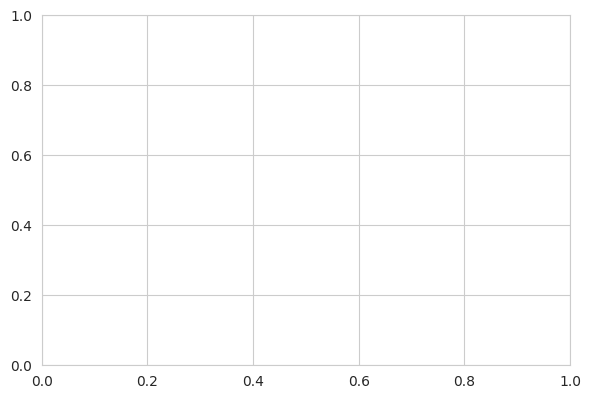

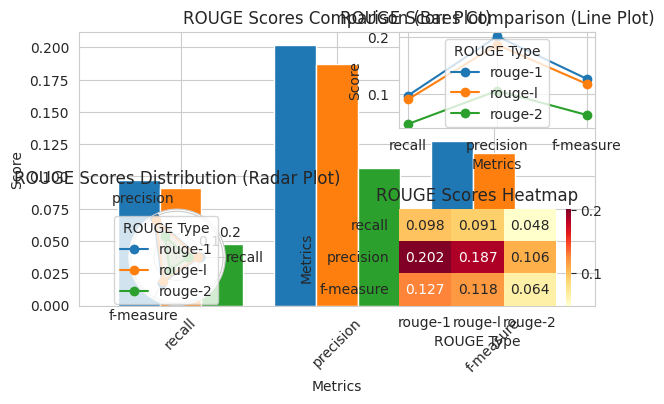

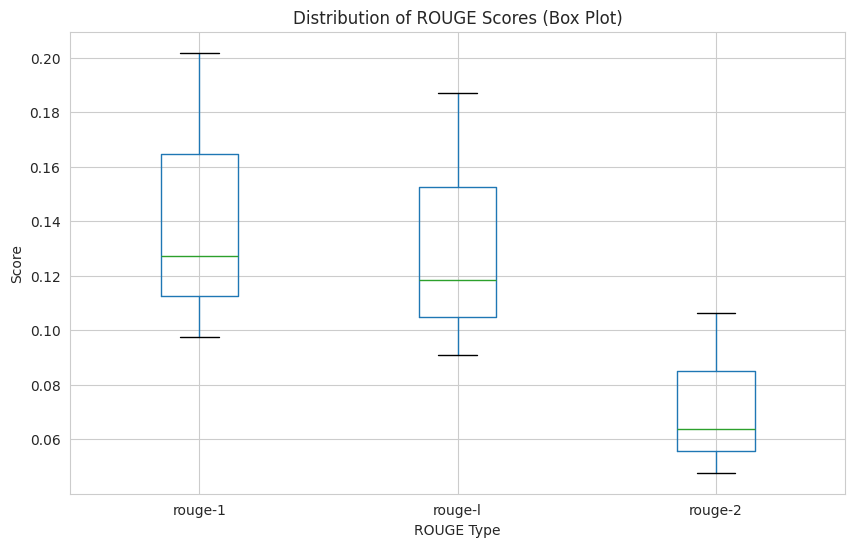

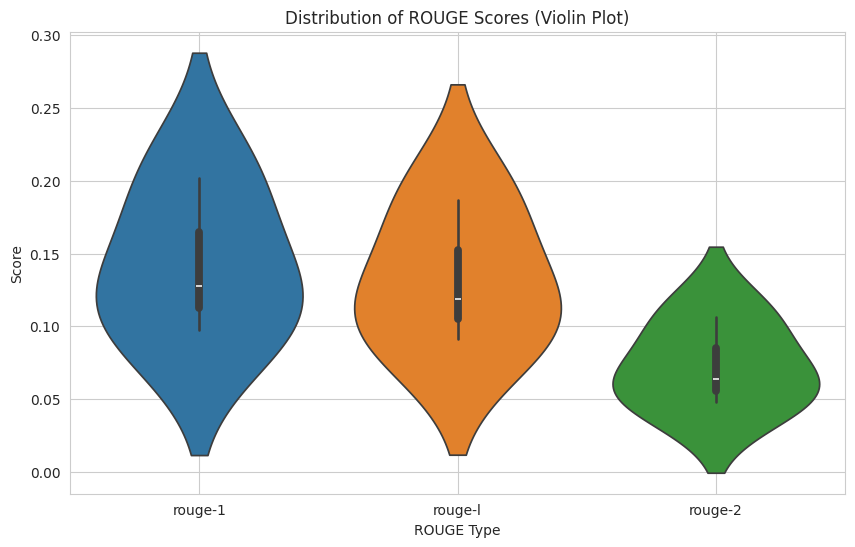

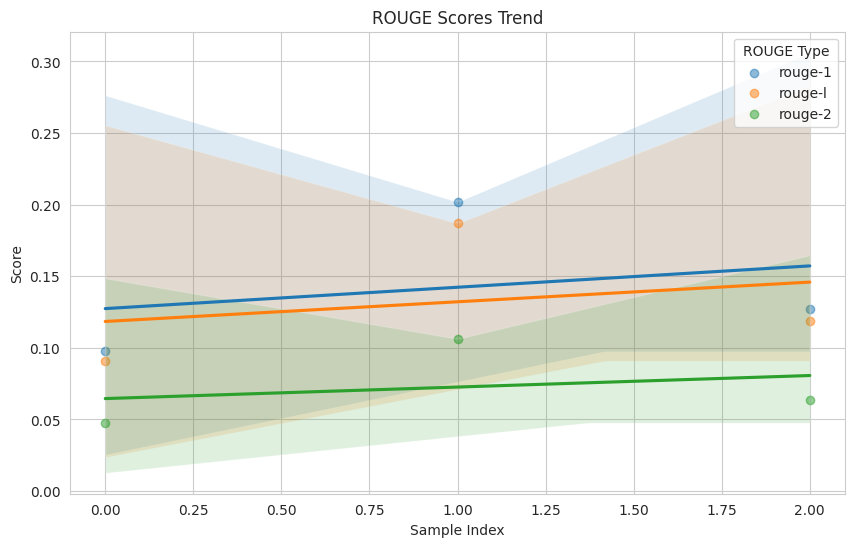

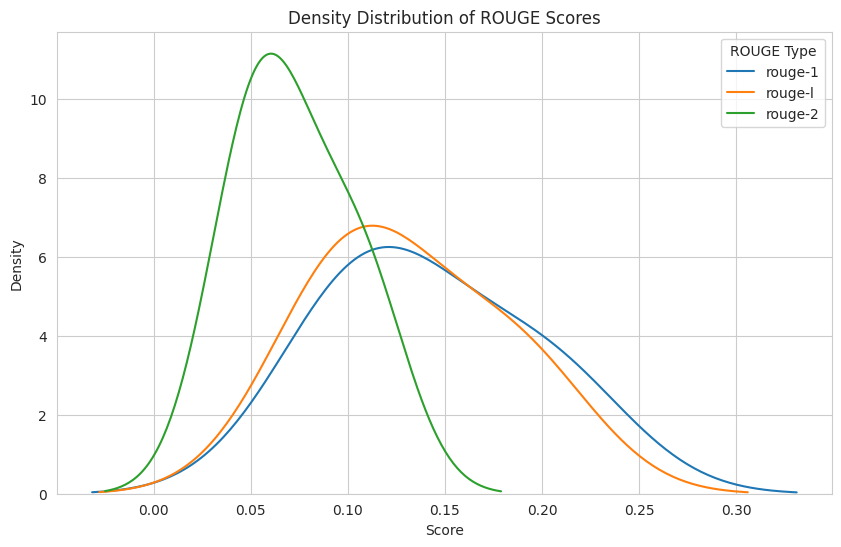

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# Create the figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Bar Plot
plt.subplot(2, 2, 1)
T5Rouge.plot(kind='bar', width=0.8)
plt.title('ROUGE Scores Comparison (Bar Plot)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='ROUGE Type')

# 2. Line Plot with Markers
plt.subplot(2, 2, 2)
for column in T5Rouge.columns:
    plt.plot(T5Rouge.index, T5Rouge[column], marker='o', label=column)
plt.title('ROUGE Scores Comparison (Line Plot)')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='ROUGE Type')
plt.grid(True)

# 3. Radar/Spider Plot
plt.subplot(2, 2, 3, projection='polar')
categories = T5Rouge.index
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

for column in T5Rouge.columns:
    values = T5Rouge[column].values.flatten()
    values = np.concatenate((values, [values[0]]))
    plt.plot(angles, values, marker='o', label=column)
    plt.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], categories)
plt.title('ROUGE Scores Distribution (Radar Plot)')
plt.legend(title='ROUGE Type')

# 4. Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(T5Rouge, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('ROUGE Scores Heatmap')
plt.xlabel('ROUGE Type')
plt.ylabel('Metrics')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Additional visualizations in separate figures

# Box Plot
plt.figure(figsize=(10, 6))
T5Rouge.boxplot()
plt.title('Distribution of ROUGE Scores (Box Plot)')
plt.xlabel('ROUGE Type')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=T5Rouge)
plt.title('Distribution of ROUGE Scores (Violin Plot)')
plt.xlabel('ROUGE Type')
plt.ylabel('Score')
plt.grid(True)
plt.show()

# Let's add a few more visualizations

# Scatter Plot with Trend Line
plt.figure(figsize=(10, 6))
for column in T5Rouge.columns:
    sns.regplot(x=np.arange(len(T5Rouge)), y=T5Rouge[column],
                label=column, scatter_kws={'alpha':0.5})
plt.title('ROUGE Scores Trend')
plt.xlabel('Sample Index')
plt.ylabel('Score')
plt.legend(title='ROUGE Type')
plt.grid(True)
plt.show()

# KDE Plot (Density Distribution)
plt.figure(figsize=(10, 6))
for column in T5Rouge.columns:
    sns.kdeplot(data=T5Rouge[column], label=column)
plt.title('Density Distribution of ROUGE Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend(title='ROUGE Type')
plt.grid(True)
plt.show()

In [23]:
fig = px.bar(BartRouge*100, x=BartRouge.index, y=BartRouge.columns,
             barmode='group',
             text_auto='.2s',
             labels={
                     "Algo": "Algorithms",
                     "value": "Rouge Score",
                     "variable": "legend",
                     'index': "Metrics"
                 })
fig.update_layout( width=650,
                  height=400,
                title={
                  'text': "Score",
                  'y':.96,
                  'x':0.49,
                  'xanchor': 'center',
                  'yanchor': 'top'})

fig.show()

### **Sample Summaries**

In [ ]:
[i for i in Summaries['GoldSummary'][:5]]

["Chandrayaan-3: আজ কখন, কোথা থেকে উৎক্ষেপণ, ভারতের গর্বের নতুন মিশনের সব তথ্য এক ক্লিকে chandrayaan 3 launch: Know when and whre to watch live updates of isro chandrayaan 3 countdown begins india's moon mission, this time scientists are more cautious",
 'Suvendu Adhikari: নন্দীগ্রামে পঞ্চায়েত ভোট থেকে শুরু করে রাজ্যের ডেঙ্গি পরিস্থিতি, একাধিক বিষয়ে আবার মুখ খুললেন রাজ্যের বিরোধী দলনেতা শুভেন্দু অধিকারী। দলীয় পদ নিয়েও দিলেন বিস্ফোরক উত্তর West Bengal Opposition Leader opens up on different issues like Nandigram and Panchayat Election and his aim in BJP Party',
 'Bus Accident: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর্ঘটনা।\xa0সল্টলেক বিকাশ ভবনের সামনে নিয়ন্ত্রণ হারাল বাস। sudden road accident in Kolkata Saltlake area 5 injured',
 'সৌমিত্র খাঁ বলেন, ২০১৯ সালে বিজেপিতে যোগদানের পর থেকে এমন মাঝে মাঝেই রটে যায় সৌমিত্র খাঁ অন্য কোনও দলে চলে যাচ্ছেন। এসবই ভ্রান্ত ধারণা। | bangla news bengal bjp Saumitra Khan rumor on tmc joining and meeting with abhishek banerjee',
 'দলীয় নেতা কর্মীদের মিষ্টি মু

In [ ]:
[i for i in Summaries['T5Summary'][:5]]

['ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন! চন্দ্রায়ন ৩ -র উৎক্ষেপণ',
 'কলকাতার নন্দীগ্রামে পঞ্চায়েত ভোট থেকে শুরু করে রাজ্যের ডেঙ্গি পরিস্থিতি, একাধিক বিষয়ে আবার মুখ খুললেন রাজ্য বিরোধী দলনেতা শুভেন্দু অধিকারী।',
 'কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর্ঘটনা। সল্টলেক বিকাশ ভবনের সামনে নিয়ন্ত্রণ হারাল বাস।',
 'ভারতের লোকসভা নির্বাচনে বিজেপির জয় নিয়ে তীব্র কটাক্ষ করেছেন বিজেপি নেত্রী অমিত শাহ।',
 'ভারতের লোকসভা নির্বাচনে বড় অঙ্কের ব্যবধানে বিজেপির জেলা পরিষদের ৪৪ নং থেকে জয়ী হয়েছেন তৃণমূলের সুজাতা মণ্ডল।']

In [ ]:
[i for i in Summaries['BartSummary'][:5]]

['শ্রীহরিক্্বা: শারতের মহাকাশ বিং্ানে 留শের ্ারু留 গর্বের বিন৷ 留ংং হবে',
 'কলকাতা: নন্্্্রামে প্্া্্্্্্্্ব্রামে শুরু করে রাং্যের বেং্বি পরিস',
 'কলকাতা: রবিবারের দুপুরে শহরের রাস্তায় বাস দুর্留শনা। সল্ংলেক বিকাশ',
 'প্রিয়ব্রত বংস্বামী, বাংকুং়া: ত達達ম達লে যাংয়ার ংল্পনা 留ং়ালেন বিংুপ',
 'বাংকুং়া: ব্্্্্কের ব্যবংানে বা達কুং়ার ব্যবংর ব্লকের বেলাপরিংের  ন']